In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
train=pd.read_csv('data/PUBG/train_v2.csv')

In [3]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [5]:
#查看数据数量
train.shape

(4446966, 29)

In [6]:
#查看共多少场比赛
np.unique(train['matchId']).shape

(47965,)

In [7]:
#查看有多少队伍
np.unique(train['groupId']).shape

(2026745,)

# 数据基本处理

### 数据缺失值处理

In [8]:
train_miss=train[train.isna().any(axis=1)]
train_miss

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [9]:
# train.drop(2744604,inplace=True)
train_miss=train[train.isna().any(axis=1)]
train_miss

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


## 特征数据规范化处理

#### 查看每场比赛参加的人数 增加列playersJoined

#### 排序,figure画图，

In [10]:
count=train.groupby('matchId')['matchId'].transform('count')
train['playersJoined']=count

In [11]:
train['playersJoined'].sort_values().head()

2744604    1
1206365    2
2109739    2
882193     5
696000     5
Name: playersJoined, dtype: int64

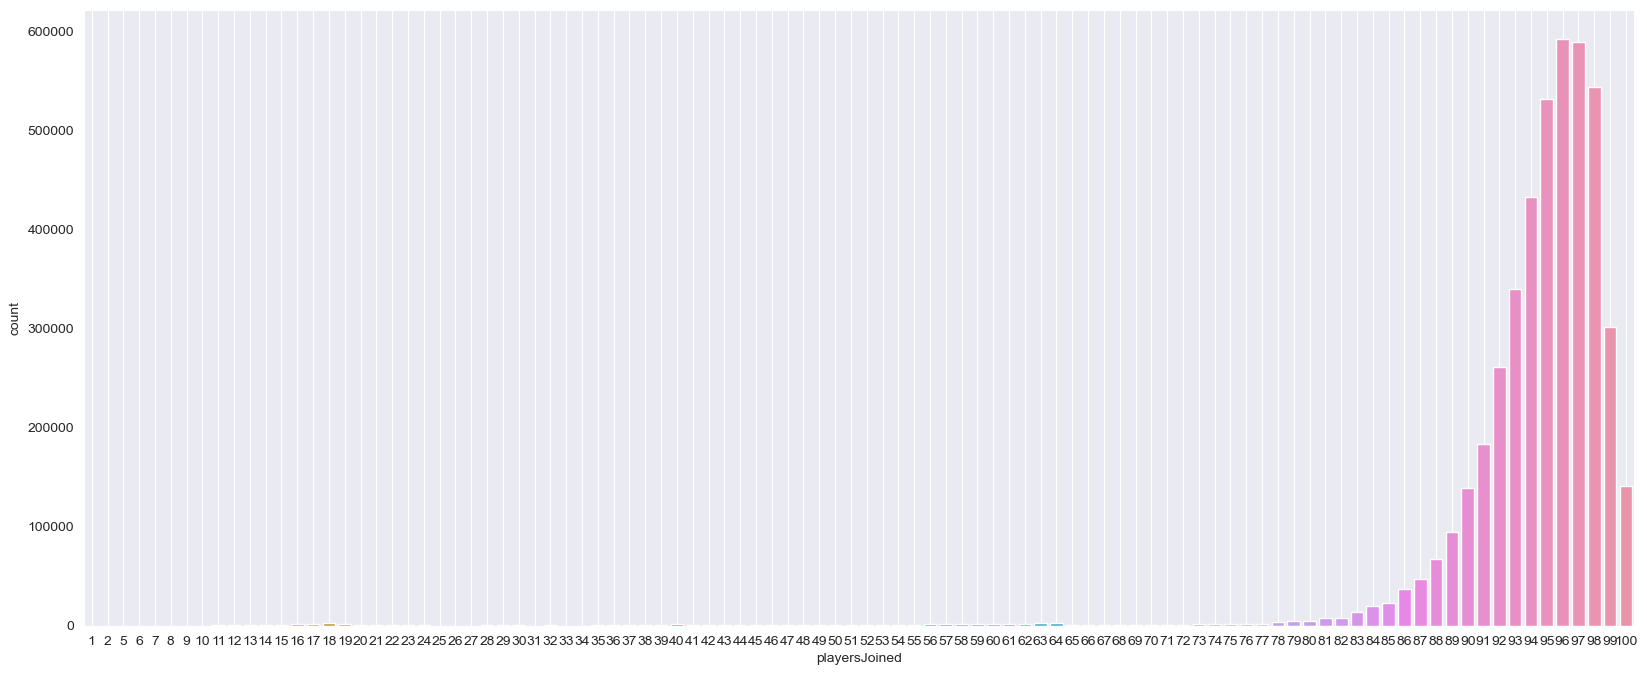

In [12]:
plt.figure(figsize=(20,8))
sns.countplot(data=train,x='playersJoined')
plt.grid()
plt.show()

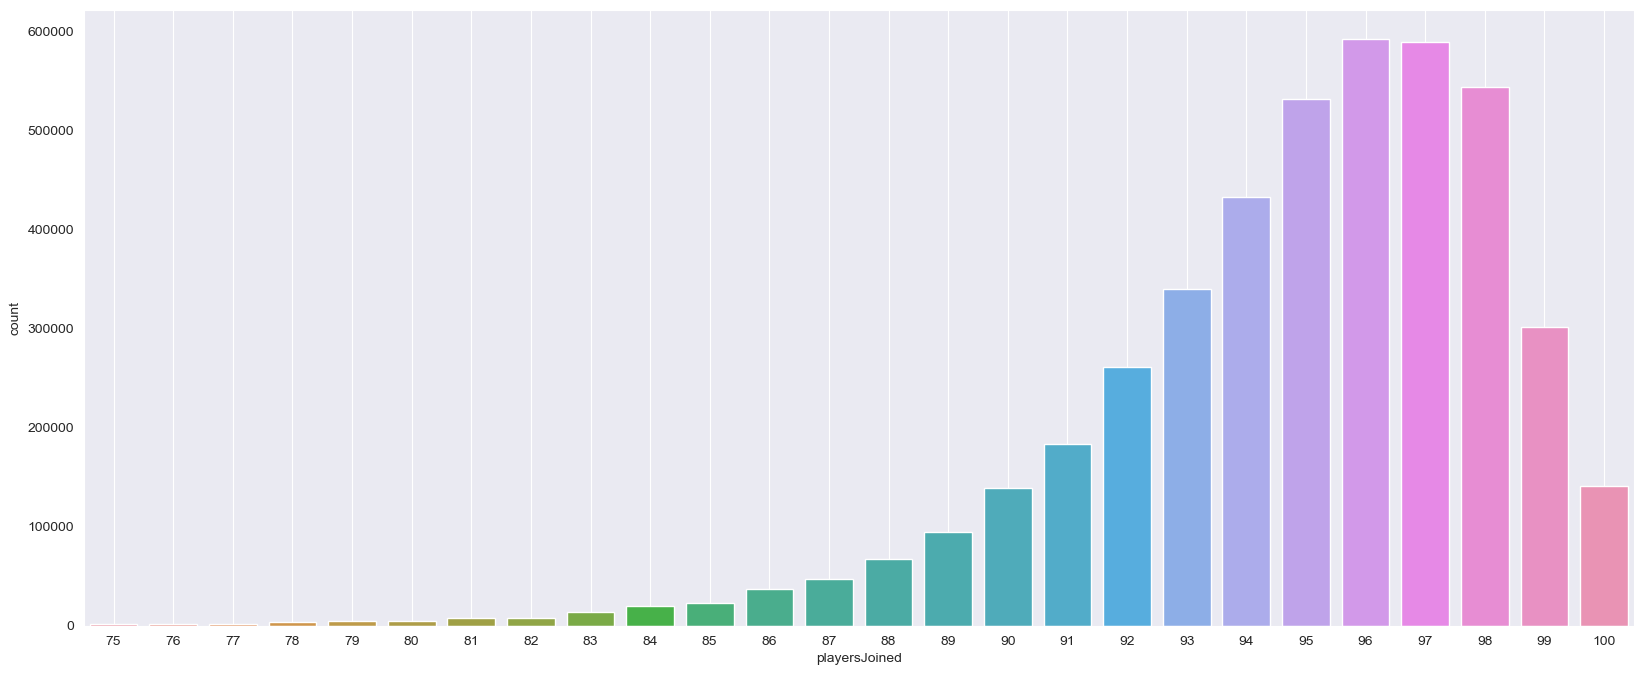

In [13]:
plt.figure(figsize=(20,8))
sns.countplot(data=train[train['playersJoined']>=75],x='playersJoined')
plt.grid()
plt.show()

#### 规范化数据输出，满员下和非满员下击杀相同数量难度不一样

In [14]:
train['killsNorm']= train['kills'] *((100-train['playersJoined'])/100+1)
train["damageDealtNorm"] = train["damageDealt"] * ((100-train["playersJoined"])/100+1)
train["maxPlaceNorm"] = train["maxPlace"] * ((100-train["playersJoined"])/100+1)
train["matchDurationNorm"] = train["matchDuration"] * ((100-train["playersJoined"])/100+1)

In [15]:
# 比较经过规范化的特征值和原始特征值的值
to_show = ['Id', 'kills','killsNorm','damageDealt', 'damageDealtNorm', 'maxPlace', 'maxPlaceNorm', 'matchDuration', 'matchDurationNorm']
train[to_show][0:11]

,Id,kills,killsNorm,damageDealt,damageDealtNorm,maxPlace,maxPlaceNorm,matchDuration,matchDurationNorm
0,7f96b2f878858a,0,0.00,0.000,0.00000,28,29.12,1306,1358.24
1,eef90569b9d03c,0,0.00,91.470,99.70230,26,28.34,1777,1936.93
2,1eaf90ac73de72,0,0.00,68.000,69.36000,50,51.00,1318,1344.36
3,4616d365dd2853,0,0.00,32.900,35.86100,31,33.79,1436,1565.24
4,315c96c26c9aac,1,1.03,100.000,103.00000,97,99.91,1424,1466.72
5,ff79c12f326506,1,1.05,100.000,105.00000,28,29.40,1395,1464.75
6,95959be0e21ca3,0,0.00,0.000,0.00000,28,28.84,1316,1355.48
7,311b84c6ff4390,0,0.00,8.538,8.87952,96,99.84,1967,2045.68
8,1a68204ccf9891,0,0.00,51.600,53.14800,28,28.84,1375,1416.25
9,e5bb5a43587253,0,0.00,37.270,38.38810,29,29.87,1930,1987.90


#### 部分变量合成

In [16]:
train["healsandboosts"] = train["heals"] + train["boosts"]
train[["heals", "boosts", "healsandboosts"]].tail(10)

,heals,boosts,healsandboosts
4446956,1,0,1
4446957,0,1,1
4446958,0,0,0
4446959,0,0,0
4446960,0,0,0
4446961,0,0,0
4446962,0,1,1
4446963,0,0,0
4446964,2,4,6
4446965,1,2,3


#### 异常值处理

In [17]:
##删除有击杀，但是没有移动的玩家
train["totalDistance"] = train["rideDistance"] + train["walkDistance"] + train["swimDistance"]
train['killwithoutMoving']=(train['kills']>0) & (train['totalDistance']==0)

In [18]:
train.drop(train[train['killwithoutMoving']==True].index,inplace=True)

In [19]:
#### 异常值处理：删除驾车杀敌数异常的数据
train.drop(train[train["roadKills"] > 10].index, inplace=True)

In [20]:
train.drop(train[train['kills']>30].index, inplace=True)

In [21]:
#### 异常值处理：删除爆头率异常数据
train["headshot_rate"] = train["headshotKills"]/train["kills"]
train["headshot_rate"].head()
train["headshot_rate"] = train["headshot_rate"].fillna(0)
train[(train["headshot_rate"] == 1) & (train["kills"] > 9)].head()
train.drop(train[(train["headshot_rate"] == 1) & (train["kills"] > 9)].index, inplace=True)

In [22]:
#击杀距离大于1000的数据
train.drop(train[train['longestKill']>1000].index,inplace=True)

In [23]:
#行走距离过远的数据
train.drop(train[train["walkDistance"] >=10000].index, inplace=True)
train.drop(train[train["rideDistance"] >=20000].index, inplace=True)
train.drop(train[train["swimDistance"] >=20000].index, inplace=True)

In [24]:
#武器收集，药品使用数量过多的异常
train.drop(train[train["weaponsAcquired"] >=80].index, inplace=True)
train.drop(train[train["heals"] >=80].index, inplace=True)

### 类别数据处理

In [25]:
train=pd.get_dummies(train,columns=['matchType'])

In [26]:
matchType_encoding=train.filter(regex='matchType')
matchType_encoding.head()

,matchType_crashfpp,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [27]:
train['groupId']=train['groupId'].astype('category')
train['groupId']

0          4d4b580de459be
1          684d5656442f9e
2          6a4a42c3245a74
3          a930a9c79cd721
4          de04010b3458dd
                ...      
4446961    d238e426f50de7
4446962    408cdb5c46b2ac
4446963    e26ac84bdf7cef
4446964    c2223f35411394
4446965    8c74f72fedf5ff
Name: groupId, Length: 4444901, dtype: category
Categories (2026243, object): ['00000c08b5be36', '00000d1cbbc340', '000025a09dd1d7', '000038ec4dff53', ..., 'fffff305a0133d', 'fffff32bc7eab9', 'fffff7edfc4050', 'fffff98178ef52']

In [28]:
train['groupId_cat']=train['groupId'].cat.codes
train['groupId_cat']

0           613620
1           827617
2           843308
3          1340123
4          1757412
            ...   
4446961    1663905
4446962     512836
4446963    1792200
4446964    1536624
4446965    1113827
Name: groupId_cat, Length: 4444901, dtype: int32

In [29]:
train['matchId']=train['matchId'].astype("category")
train['matchId_cat']=train['matchId'].cat.codes
train['matchId_cat']

0          30086
1          32752
2           3143
3          45261
4          20532
           ...  
4446961     4448
4446962    44628
4446963    20383
4446964    37720
4446965    18417
Name: matchId_cat, Length: 4444901, dtype: int32

In [30]:
train.drop(['groupId','matchId'],axis=1,inplace=True)

## 数据截取

In [31]:
df_sample=train.sample(100000)
df_sample.shape

(100000, 53)

In [32]:
#特征值
df=df_sample.drop(['winPlacePerc','Id'],axis=1)
#目标
y=df_sample['winPlacePerc']

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.2)

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_absolute_error

## 初步使用随机森林模型进行训练

In [35]:
m1=RandomForestRegressor(n_estimators=40,min_samples_leaf=3,max_features='sqrt',n_jobs=-1)
m1.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

In [36]:
y_pre=m1.predict(x_test)
m1.score(x_test,y_test)

0.9050061903350385

In [37]:
mean_absolute_error(y_test,y_pre)

0.06681187804046383

In [38]:
#表示每个特征的重要性
m1.feature_importances_

array([2.59424578e-03, 7.07402065e-02, 1.91705753e-02, 3.34763923e-03,
       5.87980079e-04, 3.06120967e-02, 1.84359393e-01, 2.30297826e-03,
       4.28284230e-03, 4.83220369e-03, 3.34039083e-02, 1.10313669e-02,
       6.58787889e-03, 7.10226234e-03, 3.99868783e-03, 5.10343021e-04,
       1.87832575e-02, 1.08748619e-05, 2.45741996e-03, 1.20775139e-04,
       3.31640251e-05, 2.41995232e-01, 5.28447769e-02, 2.87594390e-03,
       6.17365865e-03, 6.56889699e-03, 1.53826267e-02, 7.40714350e-03,
       1.27923356e-02, 1.12735215e-01, 1.19846528e-01, 0.00000000e+00,
       7.43300266e-04, 3.70677026e-05, 0.00000000e+00, 2.40416718e-04,
       4.90441785e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.64092114e-05, 0.00000000e+00, 7.08584834e-06, 0.00000000e+00,
       2.76466744e-04, 3.09028735e-04, 9.25554643e-04, 1.11342633e-03,
       9.47773843e-04, 4.73404948e-03, 4.64652169e-03])

In [39]:
imp_df=pd.DataFrame({'cols':df.columns,'imp':m1.feature_importances_})
imp_df

,cols,imp
0,assists,0.002594
1,boosts,0.070740
2,damageDealt,0.019171
3,DBNOs,0.003348
4,headshotKills,0.000588
5,heals,0.030612
6,killPlace,0.184359
7,killPoints,0.002303
8,kills,0.004283
9,killStreaks,0.004832


In [40]:
imp_df=imp_df.sort_values('imp',ascending=False)
imp_df.head()

,cols,imp
21,walkDistance,0.241995
6,killPlace,0.184359
30,totalDistance,0.119847
29,healsandboosts,0.112735
1,boosts,0.070740


<Axes: xlabel='cols'>

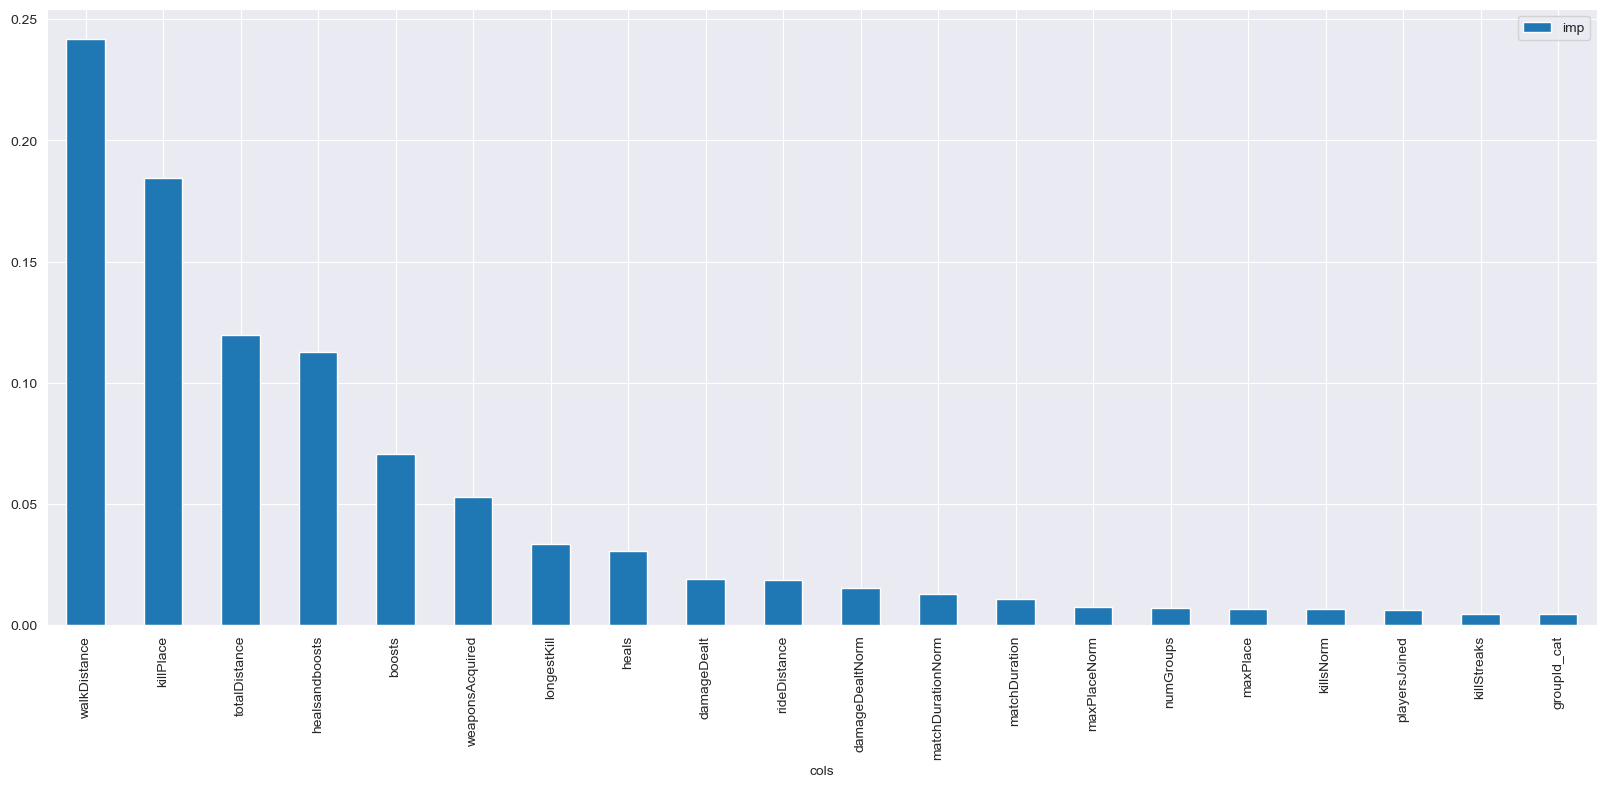

In [41]:
imp_df[:20].plot('cols','imp',figsize=(20,8),kind='bar')

In [42]:
to_keep=imp_df[imp_df.imp>0.005].cols
to_keep.count()

18

In [43]:
df_keep=df[to_keep]
df_keep.shape

(100000, 18)

In [44]:
x_train,x_test,y_train,y_test=train_test_split(df_keep,y,test_size=0.2)

In [45]:
m2=RandomForestRegressor(n_estimators=40,min_samples_leaf=3,max_features='sqrt',n_jobs=-1)
m2.fit(x_train,y_train)
y_pre=m2.predict(x_test)
score=m2.score(x_test,y_test)
miss=mean_absolute_error(y_test,y_pre)
score,miss

(0.9113216649473761, 0.06447156451225472)

## 使用lightGbm进行模型训练

In [51]:
x_train, x_valid, y_train, y_valid = train_test_split(df, y, test_size=0.2)

In [47]:
import lightgbm as lgb

In [52]:
gbm=lgb.LGBMRegressor(objective='regression',num_leaves=31,learning_rate=0.05,n_estimators=20)
callbacks = [lgb.early_stopping(stopping_rounds=5)]
gbm.fit(x_train,y_train,eval_set=[(x_valid,y_valid)],eval_metric='l1',callbacks=callbacks)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4681
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 45
[LightGBM] [Info] Start training from score 0.473229
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[20]	valid_0's l1: 0.123439	valid_0's l2: 0.0220569


LGBMRegressor(learning_rate=0.05, n_estimators=20, objective='regression')

In [54]:
#使用最优迭代次数迭代
y_pre=gbm.predict(x_valid,num_iteration=gbm.best_iteration_)
y_pre

array([0.38323321, 0.20523215, 0.59330273, ..., 0.27703998, 0.20994383,
       0.3158528 ])

In [55]:
mean_absolute_error(y_valid,y_pre)

0.12343893051272944

## 模型二次调优

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
estimator=lgb.LGBMRegressor(num_leaves=31)
param_grid={
    'learning_rate':[0.01,0.1,1],
    'n_estimators':[40,60,80,100,200,300]
}
gbm=GridSearchCV(estimator,param_grid,cv=5,n_jobs=-1)
gbm.fit(x_train,y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4681
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 45
[LightGBM] [Info] Start training from score 0.473229


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [40, 60, 80, 100, 200, 300]})

In [60]:
gbm.best_params_

{'learning_rate': 0.1, 'n_estimators': 300}

## 第三次调优

In [62]:
scores=[]
n_estimators=[100,300,500,800]
for nes in n_estimators:
    lgbm=lgb.LGBMRegressor(boosting_type='gbdt',num_leaves=31,max_depth=5,learning_rate=0.1,n_estimators=nes,min_child_samples=20,n_jobs=-1)
    lgbm.fit(x_train,y_train,eval_set=[(x_valid,y_valid)],eval_metric='l1',callbacks=callbacks)
    y_pre=lgbm.predict(x_valid)
    mae=mean_absolute_error(y_valid,y_pre)
    scores.append(mae)
    print("本次结果输出的mae值是:\n", mae)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4681
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 45
[LightGBM] [Info] Start training from score 0.473229
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

Text(0.5, 0, 'n_estimator')

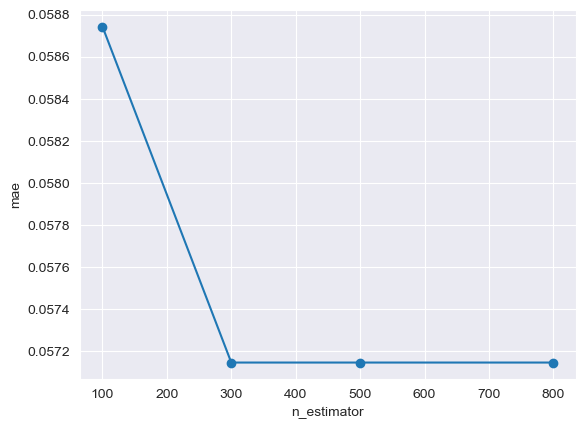

In [63]:
plt.plot(n_estimators,scores,'o-')
plt.ylabel("mae")
plt.xlabel("n_estimator")

In [64]:
scores=[]
max_depth = [3, 5, 7, 9, 11]
for md in max_depth:
    lgbm=lgb.LGBMRegressor(boosting_type='gbdt',num_leaves=31,max_depth=md,learning_rate=0.1,n_estimators=300,min_child_samples=20,n_jobs=-1)
    lgbm.fit(x_train,y_train,eval_set=[(x_valid,y_valid)],eval_metric='l1',callbacks=callbacks)
    y_pre=lgbm.predict(x_valid)
    mae=mean_absolute_error(y_valid,y_pre)
    scores.append(mae)
    print("本次结果输出的mae值是:\n", mae)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4681
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 45
[LightGBM] [Info] Start training from score 0.473229
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

Text(0.5, 0, 'max_depth')

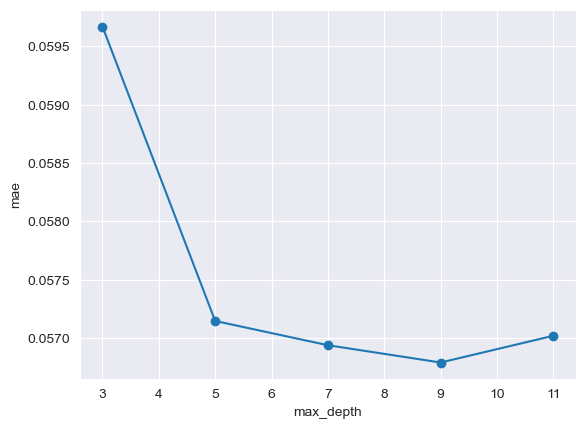

In [65]:
plt.plot(max_depth,scores,'o-')
plt.ylabel("mae")
plt.xlabel("max_depth")